_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech "out.csv", que encontrarás en la misma página del campus donde están instrucciones y notebook.

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

## EDA

In [ ]:
# coloca tu código y respuestas del punto 1 en esta sección

In [ ]:
#cargar el dataset
import pandas as pd

df = pd.read_csv("out.csv", sep=",", quotechar='"', encoding='utf-8')
df.head()


,A,B,C,D,E,comentario,label,A_t,B_t,C_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,...,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,...,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,...,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,...,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,...,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244


In [ ]:
df.describe(include = "all")

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,9461,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,"terrorismo,informativo,",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.957400,26.098100,5.674600,0.091300,2.200600,NaN,0.500000,0.735989,0.895389,1.014276,...,2.448370,2.515129,-0.222304,-0.324603,3.343632,-0.302639,-0.756762,-0.286422,-0.357238,-0.050935
std,1.741864,34.012341,7.317149,0.352671,2.729488,NaN,0.500025,1.863010,1.672944,1.844389,...,8.690527,9.827254,1.160914,1.547278,10.567912,1.045447,0.885760,1.218960,1.297408,1.129825
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,-0.287998,-0.388282,-0.416086,...,-2.197166,-3.582457,-10.573231,-11.207779,-1.393841,-6.558948,-8.362074,-9.067027,-11.559651,-5.886890
25%,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,-0.287998,-0.339096,-0.164022,...,-0.086494,-0.097950,-0.432068,-0.686619,-0.025057,-0.760297,-0.943189,-0.561697,-0.716113,-0.993166
50%,0.000000,5.000000,3.000000,0.000000,0.000000,NaN,0.500000,-0.287998,-0.142350,0.340105,...,0.097659,0.047238,0.119973,-0.415081,0.063687,-0.043150,-0.808442,-0.141680,-0.314500,0.221244
75%,1.000000,46.000000,7.000000,0.000000,6.000000,NaN,1.000000,0.781552,1.874292,1.348361,...,1.157323,0.659812,0.119973,0.152955,2.527222,0.141260,-0.314174,0.068328,0.087112,0.221244


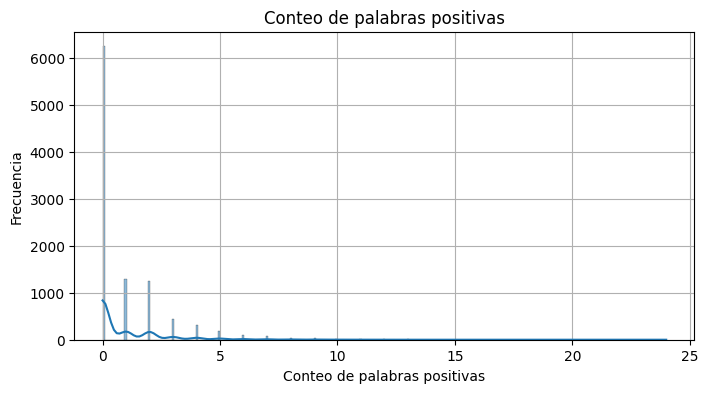

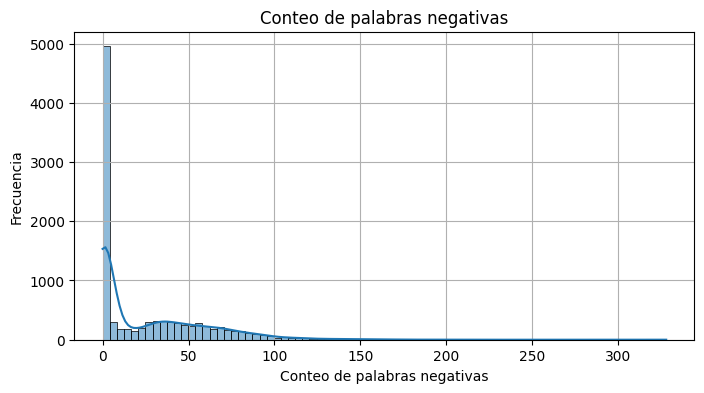

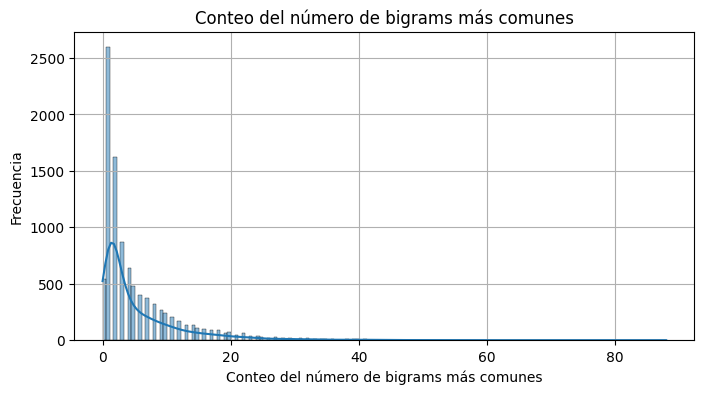

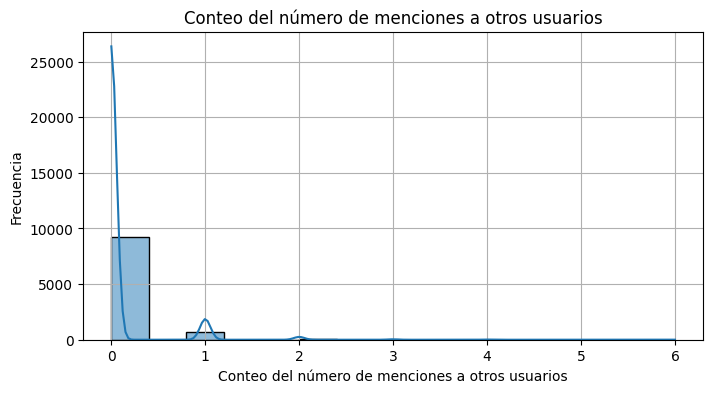

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir columnas y su descripción
columns = {
    'A': 'Conteo de palabras positivas',
    'B': 'Conteo de palabras negativas',
    'C': 'Conteo del número de bigrams más comunes',
    'D': 'Conteo del número de menciones a otros usuarios'
}

# Graficar histogramas con KDE
for col, description in columns.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(description)
    plt.xlabel(description)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


*  CONTEO DE PALABRAS POSITVAS : Distribución altamente sesgada a la izquierda. La mayoría de los comentarios contienen 0 a 2 palabras positivas. El pico más alto está en 0, indicando que muchos textos no expresan sentimientos positivos

*   CONTEO DE PALABRAS NEGATIVAS : presenta asimetria positiva, pero con una cola mucho mas larga, aunque el valor más frecuente sigue siendo 0, hay muchos comentarios con altos conteos de negatividad (algunos superan los 300).

*   CONTEO DEL NUMERO DE BRIGRAMS : Distribución en forma de caída exponencial, hay una alta concentración entre 0 y 5 bigrams, y luego una rápida disminución.Valores superiores a 20 son muy poco comunes, pero existen.


*   CONTEO DE NUMERO DE MENCIONES A OTROS USUARIOS : Claramente dominado por el valor 0, lo que indica que la mayoría de los comentarios no mencionan a nadie.
Algunos casos con 1 o 2 menciones, y valores máximos de hasta 6, pero son excepcionales.



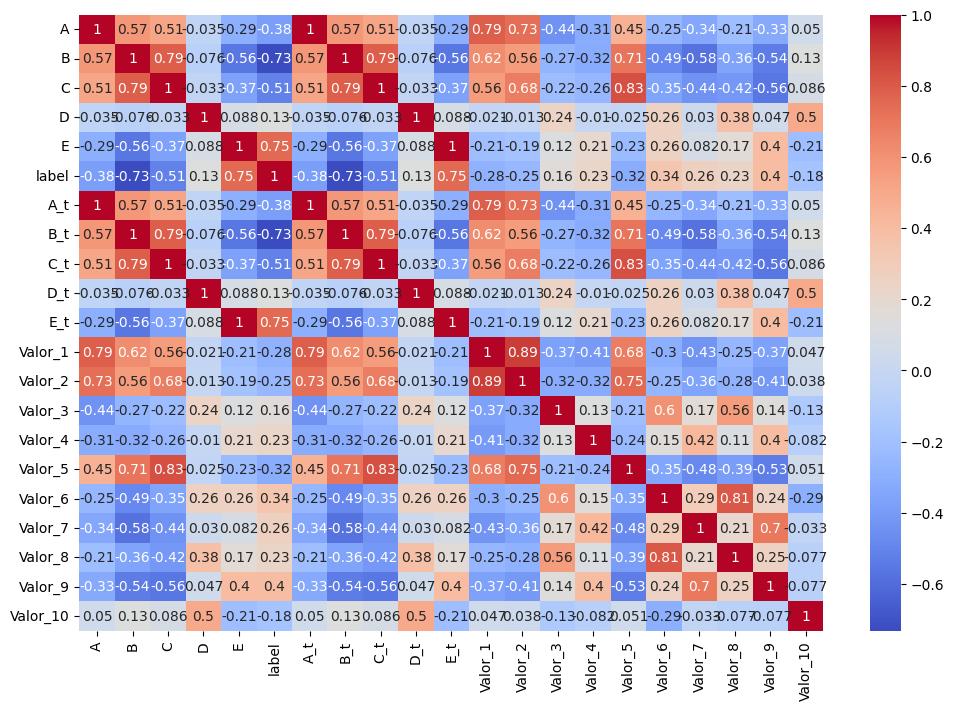

In [ ]:
#matriz de correlacion
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=["comentario"]).corr(), annot=True, cmap='coolwarm')
plt.show()

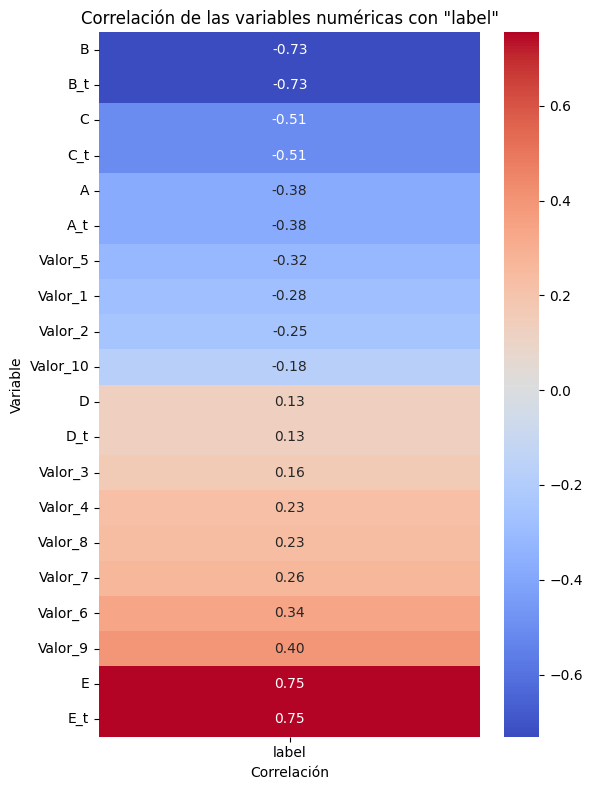

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
correlaciones = df.corr(numeric_only=True)

# Extraer correlaciones con 'label', eliminando la diagonal
correlacion_con_label = correlaciones['label'].drop('label').sort_values(ascending=True)  # ordenado de menor a mayor

# Crear heatmap vertical
plt.figure(figsize=(6, 8))
sns.heatmap(correlacion_con_label.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlación de las variables numéricas con "label"', fontsize=12)
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


Las variables mas correlacionadas E, B, C, A. Las variables redundantes son D, D_t ya que tiene baja correlacion.

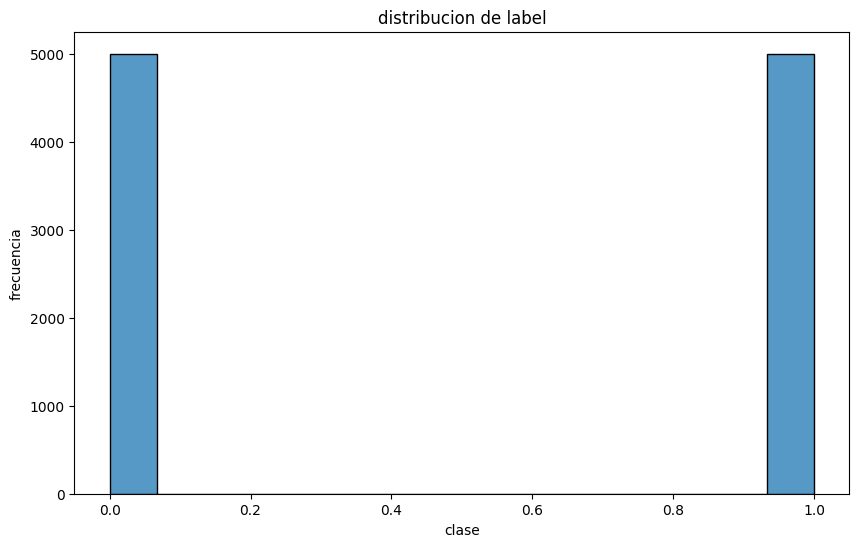

In [ ]:
#distribucion de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(x = "label",data = df)
plt.title("distribucion de label")
plt.xlabel("clase")
plt.ylabel("frecuencia")
plt.show()

la variable objetivo esta bien balanceada

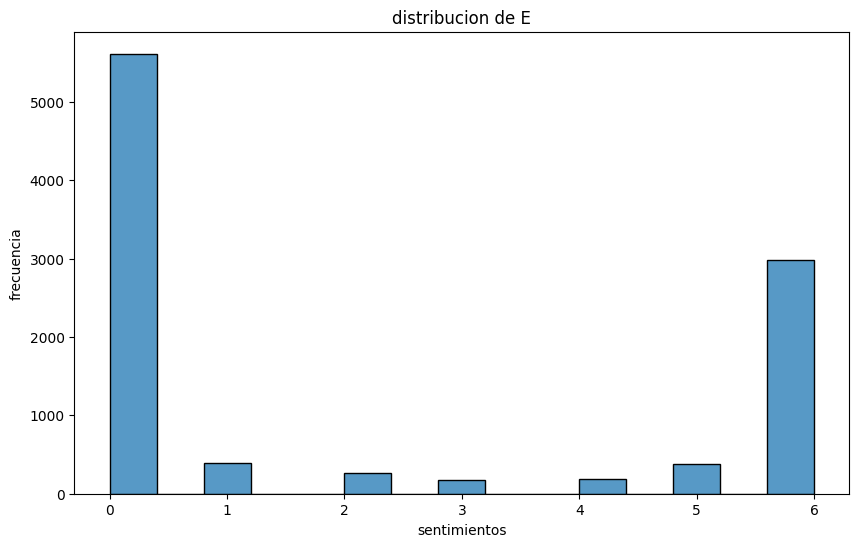

In [ ]:
#analis variable E
plt.figure(figsize=(10, 6))
sns.histplot(x = "E",data = df)
plt.title("distribucion de E")
plt.xlabel("sentimientos")
plt.ylabel("frecuencia")
plt.show()

0: ira\
1: alegria\
2: tristeza\
3: miedo\
4: sorpresa\
5: disgusto\
6: neutral

In [ ]:
#procesar la variable E ya que es categorica y se debe pasar a numerica
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
df_encoder = pd.DataFrame(encoder.fit_transform(df[['E']]), columns=encoder.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[["Valor_1", "Valor_2", "Valor_3", "Valor_4", "Valor_5",
                                                   "Valor_6", "Valor_7", "Valor_8", "Valor_9", "Valor_10"]]))


df_previo_scalada = df[["A_t", "B_t", "C_t", "D_t"]]
df_final = pd.concat([df_previo_scalada, df_encoder, df_scaled], axis=1)


## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

Seleccionare 3 modelos distintos, Regresion logistica Y Maquina de vectores de soporte y random forest \

### Regresion logistica
Es un modelo lineal interpretable, ideal para establecer una linea base en clasificacion binaria o = no odio , 1 = odio

*   Ventajas

  *   Es un modelo simple y facil de interpretar
  *   Es adecuado para problemas de clasificacion binaria
  
*   Justificacion

  *   Es conveniente porque segun la caracteristica del mismo sirve apara modelar la probabilidad de que una isntancia pertezca a una clase especifica.


### Máquinas de Vectores de Soporte
Es un modelo poderoso para espacios de alta dimensión, como ocurre cuando combinas muchas variables derivadas del texto.

*   Ventajas

  *   Es bueno para problemas de alta dimensionalidad y ademas es util si la separacion entre las clases es clara.
  
  
*   Justificacion

  *   Tiene buena capacidad para maximizar el margen de seperacion entre las clases, aunque pude ser computacionalmente mas pesado. ademas trabaja bien con datos no lineales.

### Random Forest
Un conjunto (ensamble) de muchos árboles de decisión.
Cada árbol se entrena con una muestra diferente de los datos y un subconjunto de variables.


*   Ventajas

  *   Es un modelo robusto, tiene usualmente tiene alta precision y no es propenso a tener overfitting
  *   No le afecta tanto los valores o datos faltantes.
  
*   Justificacion

  *   Este modelo es adecuado para problemas que tienen una gran cantidad de datos y es bueno para capturar relaciones no lineales entre las caracteristicas.

## Regresion logistica


In [ ]:
# coloca tu código y respuestas del punto 2 en esta sección

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#eliminar valores nulos
df_cleaned = df.dropna()

#definir variables predictoras y dividir
X = df_cleaned.drop(columns = ["label", "comentario"])
y = df_cleaned["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




In [ ]:
#entrenar el modelo
modelo_reg_log = LogisticRegression(max_iter=1000, class_weight="balanced",random_state=42)
modelo_reg_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

## Random Forest

In [ ]:
#Entrenamiento
from sklearn.ensemble import RandomForestClassifier

#definir variables predictoras y dividir
X_2 = df_cleaned.drop(columns = ["label", "comentario"])
y_2 = df_cleaned["label"]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, stratify=y, random_state=42)

modelo_rf = RandomForestClassifier(
    n_estimators=100,  # número de árboles
    max_depth=None,    # profundidad ilimitada
    class_weight='balanced',  # ajuste por desbalance de clases
    random_state=42
)
modelo_rf.fit(X_train_2, y_train_2)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Random Forest

In [ ]:
from sklearn.svm import SVC

#definir variables predictoras y dividir
X_3 = df_cleaned.drop(columns = ["label", "comentario"])
y_3 = df_cleaned["label"]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, stratify=y, random_state=42)

# 4. Crear y entrenar el modelo SVM
modelo_svc = SVC(
    kernel='rbf',              # kernel radial (no lineal)
    class_weight='balanced',   # ajusta pesos por clase automáticamente
    C=1.0,                     # parámetro de penalización
    probability=True,          # activa estimación de probabilidades (opcional)
    random_state=42
)
modelo_svc.fit(X_train_3, y_train_3)

SVC(class_weight='balanced', probability=True, random_state=42)

## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

## Regresion Logistica

In [ ]:
#predicion en el conjunto de prueba
y_pred_reg_log = modelo_reg_log.predict(X_test)
print("🔍 Classification Report - Regresión Logística:\n")
print(classification_report(y_test, y_pred_reg_log, digits=3))

🔍 Classification Report - Regresión Logística:

              precision    recall  f1-score   support

         0.0      0.987     0.962     0.974      1000
         1.0      0.963     0.987     0.975      1000

    accuracy                          0.975      2000
   macro avg      0.975     0.974     0.974      2000
weighted avg      0.975     0.975     0.974      2000



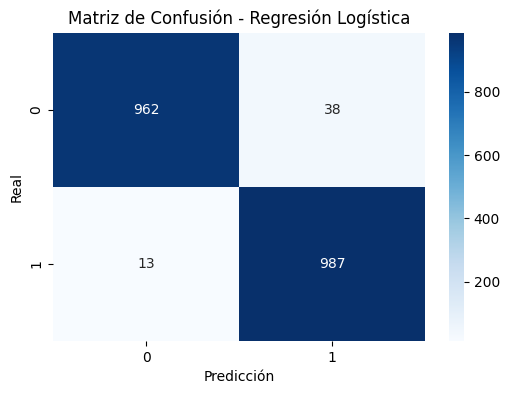

In [ ]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_reg_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades para clase 1
y_probs_reg_log = modelo_reg_log.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_reg_log)

# Calcular AUC
auc_log = roc_auc_score(y_test, y_probs_reg_log)


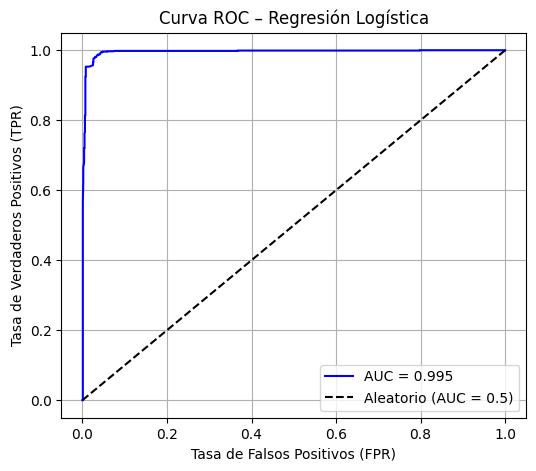

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, color='blue', label=f'AUC = {auc_log:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.title('Curva ROC – Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Random Forest


In [ ]:
y_pred_rf = modelo_rf.predict(X_test_2)
print("🔍 Classification Report - Random Forest:\n")
print(classification_report(y_test_2, y_pred_rf, digits=3))

🔍 Classification Report - Random Forest:

              precision    recall  f1-score   support

         0.0      0.985     0.978     0.981      1000
         1.0      0.978     0.985     0.982      1000

    accuracy                          0.982      2000
   macro avg      0.982     0.982     0.981      2000
weighted avg      0.982     0.982     0.981      2000



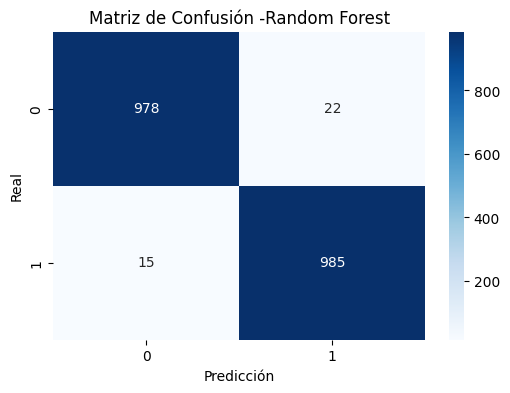

In [ ]:
# 7. Matriz de confusión
cm_2 = confusion_matrix(y_test_2, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión -Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Obtener probabilidades para clase 1
y_probs_rf = modelo_rf.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

# Calcular AUC
auc_rf = roc_auc_score(y_test, y_probs_rf)


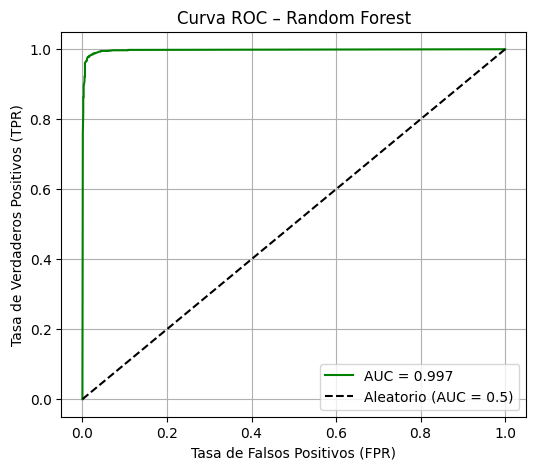

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'AUC = {auc_rf:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.title('Curva ROC – Random Forest')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Máquinas de Vectores de Soporte


In [ ]:
# 5. Predecir
y_pred_svm = modelo_svc.predict(X_test_3)

# 6. Evaluar rendimiento
print("🔍 Classification Report - SVM (SVC):\n")
print(classification_report(y_test, y_pred_svm, digits=3))

🔍 Classification Report - SVM (SVC):

              precision    recall  f1-score   support

         0.0      0.992     0.955     0.973      1000
         1.0      0.957     0.992     0.974      1000

    accuracy                          0.974      2000
   macro avg      0.974     0.974     0.973      2000
weighted avg      0.974     0.974     0.973      2000



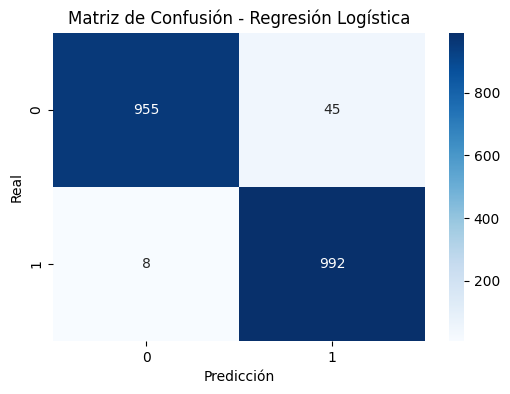

In [ ]:
# 7. Matriz de confusión
cm_3 = confusion_matrix(y_test_3, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Obtener probabilidades para clase 1
y_probs_svm = modelo_svc.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)

# Calcular AUC
auc_svm = roc_auc_score(y_test, y_probs_svm)


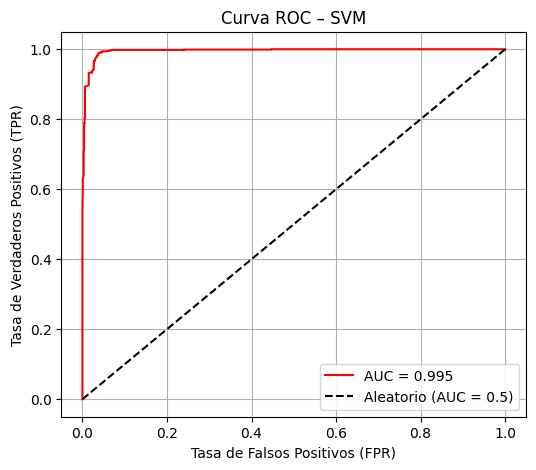

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, color='red', label=f'AUC = {auc_svm:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.title('Curva ROC – SVM')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 🔍 Conclusiones del Análisis Exploratorio de Datos (EDA)

Durante el análisis exploratorio del dataset, se realizaron diversas transformaciones y visualizaciones para entender mejor el comportamiento de los datos y su relación con la variable objetivo (`label`).

1. **Distribución de características numéricas**:  
   Se observaron distribuciones sesgadas a la derecha en variables como el conteo de palabras positivas, negativas y bigramas. La mayoría de los comentarios presentan valores bajos en estas métricas, lo cual es típico en contenido neutral o contraria.

2. **Conteo de menciones a otros usuarios**:  
   La gran mayoría de los mensajes no contienen menciones, pero se identificaron algunos casos aislados con 1 o más menciones, lo cual podría estar relacionado con interacciones personales potencialmente más sensibles a lenguaje ofensivo.

3. **Correlación entre variables**:  
   Se generó una matriz de correlación que reveló relaciones interesantes, destacando una fuerte correlación positiva entre la variable `E` y la variable `label`, lo que sugiere que el sentimiento detectado puede ser un buen predictor de odio.

4. **Relación con la variable objetivo (`label`)**:  
   Al analizar las correlaciones de todas las variables con `label`, se concluyó que las variables más relevantes para el modelo eran `B`, `C`, `E`, y algunas combinaciones como `Valor_5` y `Valor_9`, sin envargo se agregaron mas variables para agregar mas variedad a los datos.

5. **Transformaciones previas al modelado**:  
   Se aplicaron técnicas como *OneHotEncoding* para la variable `E`, y escalado (normalización) de las variables cuantitativas (`Valor_1` a `Valor_10`). Esto permitió estandarizar las entradas para que los modelos trabajen con datos comparables y optimizados.

---



## ✅ Evaluación Final de Modelos

A continuación se presenta la evaluación comparativa de los modelos Regresión Logística, Random Forest y SVM basada en tres parámetros clave:

- **Precisión**: Proporción de predicciones positivas que fueron realmente correctas. (Evita falsos positivos)
- **Recall**: Proporción de casos reales positivos que el modelo logró detectar. (Evita falsos negativos)

- **F1-score**: Media armónica entre precisión y recall. Equilibra ambos cuando hay desbalance.
- **Accuracy**: Porcentaje total de predicciones correctas sobre el total de casos.

- **Classification Report**: muestra precisión, recall, F1-score y accuracy. Es útil para evaluar qué tan bien el modelo clasifica cada clase (0 = no odio, 1 = odio).
- **Matriz de Confusión**: permite observar aciertos y errores, dividiendo los casos en verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
- **Curva ROC y AUC**: mide la capacidad del modelo para distinguir entre clases. Un AUC cercano a 1.0 indica excelente rendimiento.

---

### 📊 Resultados Comparativos

| Modelo              | Accuracy | Precision | Recall | F1-Score | AUC ROC | TN | FP | FN | TP |
|---------------------|----------|-----------|--------|----------|---------|----|----|----|----|
| Regresión Logística | 0.975    | 0.963     | 0.987  | 0.975    | 0.995   | 962| 38 | 13 | 987 |
| Random Forest       | **0.982**| **0.978** | 0.985  | **0.982**| **0.997**|978| 22 | 15 | 985 |
| SVM (SVC)           | 0.974    | 0.957     | **0.992**| 0.974  | 0.995   | 955| 45 |  8 | 992 |

---

---

### ✅ Conclusión Final

- **Random Forest** es el modelo más equilibrado y con mejor rendimiento general.  
  Obtuvo la mayor *accuracy* (0.982), *F1-score* (0.982) y *AUC ROC* (0.997), lo que lo convierte en la mejor opción cuando se requiere **máxima precisión y confiabilidad global**, tanto para detectar mensajes de odio como para evitar clasificaciones erróneas.  
  👉 **Se recomienda usar Random Forest cuando se busca un modelo robusto, con excelente capacidad predictiva y sin comprometer ninguna métrica clave.**

- **SVM (SVC)** destacó por su *recall* más alto (0.992), lo que indica que es el modelo que mejor **detecta la mayoría de los mensajes de odio**.  
  Sin embargo, también fue el que más falsos positivos cometió (FP = 45), por lo que puede etiquetar como ofensivos algunos mensajes que no lo son.  
  👉 **Se recomienda SVM en contextos donde es preferible detectar todo posible discurso de odio aunque implique alguna clasificación errónea —por ejemplo, en entornos de moderación automática o prevención de contenido tóxico.**

- **Regresión Logística** mostró un rendimiento muy competitivo (*accuracy* 0.975, *recall* 0.987), con la ventaja de ser el modelo más interpretable.  
  Es adecuado cuando se necesita **explicar las decisiones del modelo** y trabajar con modelos simples pero eficaces.  
  👉 **Se recomienda Regresión Logística cuando la prioridad es comprender y justificar las decisiones del modelo, como en auditorías, reportes regulatorios o implementaciones rápidas con bajo coste computacional.**







## Resultados de los Modelos:

| Modelo              | Accuracy | Precision | Recall | F1-Score | AUC ROC |
|---------------------|----------|-----------|--------|----------|---------|
| Regresión Logística | 0.975    | 0.963     | 0.987  | 0.975    | 0.995   |
| Random Forest       | 0.982    | 0.978     | 0.985  | 0.982    | 0.997   |
| SVM (SVC)           | 0.974    | 0.957     | 0.992  | 0.974    | 0.995   |

El modelo de **Random Forest** mostró el mejor rendimiento global, con una precisión (Accuracy) del 98.2%, seguido por **Regresión Logística** con un 97.5% y **SVM** con un 97.4%. Random Forest también obtuvo los valores más altos en términos de *Precision* (97.8%), *Recall* (98.5%) y *F1-Score* (98.2%), lo que evidencia su superioridad en la clasificación precisa de mensajes de odio y no odio, así como su capacidad para manejar tanto falsos positivos como falsos negativos de forma equilibrada.

Dado su rendimiento robusto, **Random Forest se recomienda como el modelo más efectivo** para esta tarea de clasificación. No obstante, **SVM** demostró ser el mejor modelo en *Recall* (99.2%), lo que indica que es el más eficaz para detectar la mayor cantidad de mensajes de odio posibles, aunque con un costo mayor de falsos positivos. Por su parte, **Regresión Logística** mantiene un buen rendimiento y destaca por su interpretabilidad y simplicidad, lo que la hace ideal para aplicaciones donde se prioriza la comprensión del modelo.

---

## Evaluación y Explicación de Resultados

Para evaluar los modelos, se utilizaron las curvas ROC y matrices de confusión además del classification report.  
- Las **curvas ROC** permiten visualizar el rendimiento del modelo en términos de la tasa de verdaderos positivos frente a la de falsos positivos. El **AUC ROC** (área bajo la curva) resume esa relación: cuanto más cercano a 1, mejor la capacidad del modelo para distinguir entre clases.
- Las **matrices de confusión** muestran el detalle de los aciertos y errores en la clasificación: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN), permitiendo comprender mejor dónde falla el modelo.

---

### Conclusión final

En conclusión, aunque los tres modelos ofrecieron un rendimiento alto, **Random Forest** fue el modelo más equilibrado en todas las métricas, destacando tanto en la correcta clasificación de mensajes no ofensivos como ofensivos. **SVM** es ideal cuando se busca priorizar la detección de todos los mensajes de odio, y **Regresión Logística** sigue siendo una excelente alternativa cuando se necesita transparencia, rapidez y facilidad de interpretación.
